Aluno: Nelson de Campos Nolasco.

Disciplina: Deep Learning.

Professor: Rafael Glater

<h1><center>CIFAR-10</center></h1>

É um dataset com 60.000 imagens coloridas, com dimensão 32x32, separadas em 10 classes, sendo 6.000 imagens para cada classe. São 50 mil imagens para treino e 10 mil para teste. Para mais detalhes, acesse: https://www.cs.toronto.edu/~kriz/cifar.html

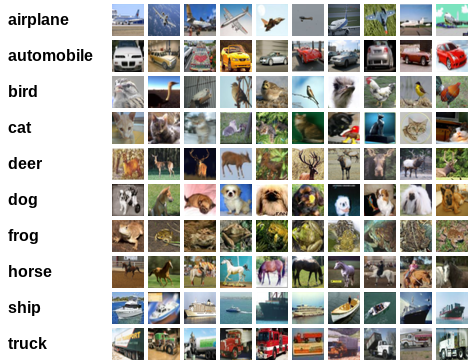

OBS: Existe também o CIFAR-100, com imagens divididas em 100 classes. Mas vamos trabalhar aqui apenas com o CIFAR-10.

In [1]:
%tensorflow_version 2.x
%matplotlib inline

In [2]:
import tensorflow as tf
from matplotlib import pyplot as plt

# Baixando os dados

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


### Conferindo

In [4]:
train_images
# len(train_images)
# train_images[0]
# train_images[0].shape
# train_images[0][:,:,2].shape

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [5]:
train_labels[1]

array([9], dtype=uint8)

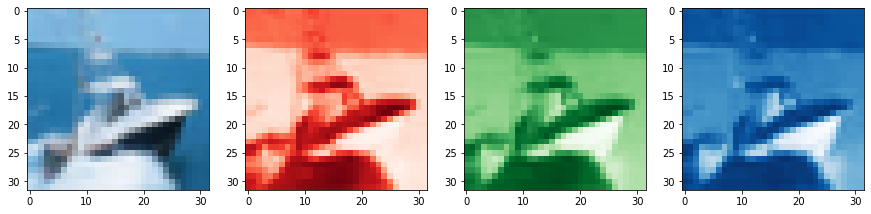

In [6]:
img_sample = train_images[8]

figure, plots = plt.subplots(ncols=4, nrows=1)
figure.set_size_inches(15, 10)
plots[0].imshow(img_sample)
plots[1].imshow(img_sample[:,:,0], cmap=plt.cm.Reds)
plots[2].imshow(img_sample[:,:,1], cmap=plt.cm.Greens)
plots[3].imshow(img_sample[:,:,2], cmap=plt.cm.Blues)
plt.show()

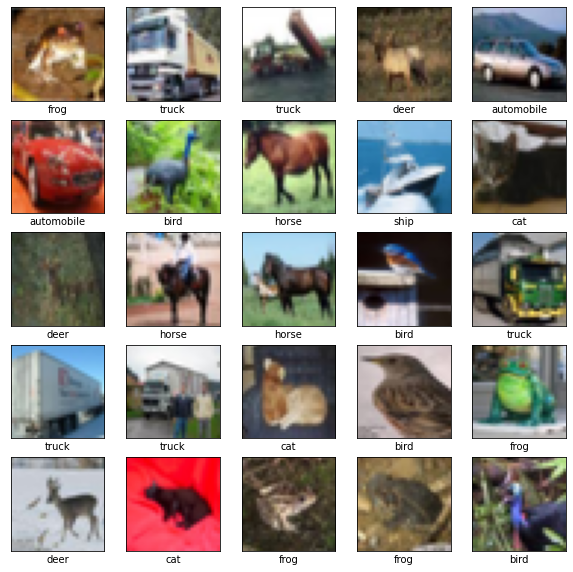

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Normalizando

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Especificando o modelo

In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(12, (4, 4), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(12, (4, 4), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Treinando

In [10]:
history = model.fit(train_images, train_labels, epochs=15)#,
                    #validation_data=(test_images, test_labels))

Epoch 1/15
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5912 - accuracy: 0.4223
Epoch 2/15
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3246 - accuracy: 0.5241
Epoch 3/15
1563/1563 [==============================] - 4s 3ms/step - loss: 1.2264 - accuracy: 0.5646
Epoch 4/15
1563/1563 [==============================] - 4s 3ms/step - loss: 1.1646 - accuracy: 0.5875
Epoch 5/15
1563/1563 [==============================] - 4s 3ms/step - loss: 1.1186 - accuracy: 0.6093
Epoch 6/15
1563/1563 [==============================] - 4s 3ms/step - loss: 1.0803 - accuracy: 0.6200
Epoch 7/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0492 - accuracy: 0.6324
Epoch 8/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0212 - accuracy: 0.6419
Epoch 9/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9963 - accuracy: 0.6515
Epoch 10/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.975

# Testando

In [11]:
model.evaluate(test_images,  test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.0405 - accuracy: 0.6469


[1.0405359268188477, 0.6468999981880188]